In [ ]:
# 정규화를 하면 규제 효과가 있다.(보장은 아님)
# 과대적합 문제를 피할 수 있다.

In [ ]:
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_mean = np.mean(x_train,axis=(0,1,2))
x_std = np.std(x_train,axis=(0,1,2))

x_train=(x_train-x_mean)/x_std
x_test =(x_test-x_mean)/x_std

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation,BatchNormalization
from keras.optimizers import Adam

model = Sequential([
    Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    #액티베이션을 별도로로
    #액티베이션으로 넘기기 전에 배치 정규화를 수행한다.


    Conv2D(filters=32,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),



    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer=Adam(1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 17s 8ms/step - loss: 1.4180 - acc: 0.5023 - val_loss: 1.1540 - val_acc: 0.5876
Epoch 2/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.9812 - acc: 0.6597 - val_loss: 0.9710 - val_acc: 0.6571
Epoch 3/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.7814 - acc: 0.7338 - val_loss: 0.9420 - val_acc: 0.6689
Epoch 4/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.6226 - acc: 0.7947 - val_loss: 0.9077 - val_acc: 0.6844
Epoch 5/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.4853 - acc: 0.8466 - val_loss: 0.8909 - val_acc: 0.6947
Epoch 6/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.3738 - acc: 0.8874 - val_loss: 0.9326 - val_acc: 0.6895
Epoch 7/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.2721 - acc: 0.9233 - val_loss: 0.9531 - val_acc: 0.6910
Epoch 8/30
1094/1094 [==============================] - 8s 8

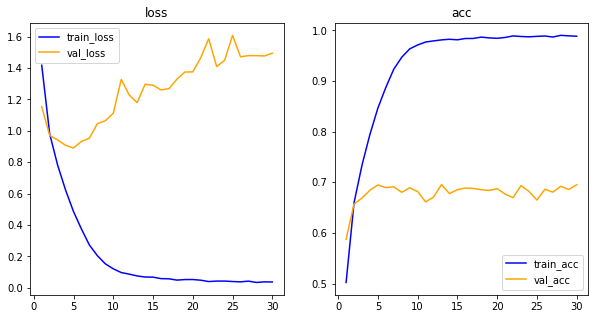

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('acc')
ax2.legend()

plt.show()